# **Paytm Data Analysis**


In [13]:
# Check Available Files

import os
os.listdir()


['.ipynb_checkpoints', 'Paytm_Dataset.xlsx', 'Untitled.ipynb']

In [14]:
# Inspect Excel File

xls = pd.ExcelFile("Paytm_Dataset.xlsx")
xls.sheet_names


['All_Users',
 'All_Transactions',
 'Recharge_Bills',
 'Money_Transfer',
 'Loans',
 'Insurance']

In [15]:
# Convert Excel Sheet All_Users to CSV

import pandas as pd

all_users = pd.read_excel(
    "Paytm_Dataset.xlsx",
    sheet_name="All_Users"
)

all_users.to_csv("All_Users.csv", index=False)

print("All_Users converted successfully")


All_Users converted successfully


In [16]:
# Convert Excel Sheet Recharge_Bills to CSV

import pandas as pd

recharge_bills = pd.read_excel(
    "Paytm_Dataset.xlsx",
    sheet_name="Recharge_Bills"
)

recharge_bills.to_csv("Recharge_Bills.csv", index=False)

print("Recharge_Bills converted successfully")


Recharge_Bills converted successfully


In [17]:
# Convert Excel Sheet Money_Transfer to CSV

import pandas as pd

money_transfer = pd.read_excel(
    "Paytm_Dataset.xlsx",
    sheet_name="Money_Transfer"
)

money_transfer.to_csv("Money_Transfer.csv", index=False)

print("Money_Transfer converted successfully")


Money_Transfer converted successfully


In [18]:
# Convert Excel Sheet Loans to CSV

import pandas as pd

loans = pd.read_excel(
    "Paytm_Dataset.xlsx",
    sheet_name="Loans"
)

loans.to_csv("Loans.csv", index=False)

print("Loans sheet converted successfully")


Loans sheet converted successfully


In [19]:
# Convert Excel Sheet Insurance to CSV

import pandas as pd

insurance = pd.read_excel(
    "Paytm_Dataset.xlsx",
    sheet_name="Insurance"
)

insurance.to_csv("Insurance.csv", index=False)

print("Insurance sheet converted successfully")


Insurance sheet converted successfully


In [20]:
# Check Available Files

os.listdir()

['.ipynb_checkpoints',
 'All_Users.csv',
 'Insurance.csv',
 'Loans.csv',
 'Money_Transfer.csv',
 'Paytm_Dataset.xlsx',
 'Recharge_Bills.csv',
 'Untitled.ipynb']

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# makes plots appear in the notebook
%matplotlib inline   

import seaborn as sns
sns.set_style("darkgrid")  # Apply seaborn darkgrid style globally

In [2]:
# Load all CSVs together
all_users = pd.read_csv("All_Users.csv")
loans = pd.read_csv("Loans.csv")
insurance = pd.read_csv("Insurance.csv")
money_transfer = pd.read_csv("Money_Transfer.csv")
recharge_bills = pd.read_csv("Recharge_Bills.csv")


In [3]:
# Quick check of sizes
print("All_Users:", all_users.shape)
print("Loans:", loans.shape)
print("Insurance:", insurance.shape)
print("Money_Transfer:", money_transfer.shape)
print("Recharge_Bills:", recharge_bills.shape)


All_Users: (107658, 7)
Loans: (50000, 9)
Insurance: (50000, 8)
Money_Transfer: (150000, 9)
Recharge_Bills: (50000, 9)


In [4]:
# Date Conversion
all_users['Join_Date'] = pd.to_datetime(all_users['Join_Date'], errors='coerce')

for df in [loans, insurance, money_transfer, recharge_bills]:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


## **Individual Exploratory Data Analysis**


### **1.All_Users EDA**


In [5]:
all_users.head(10)

,User_ID,Name,Age,Join_Date,Gender,Profile_Age,Country
0,PTM0000001,Holly Rivera,56,2025-06-17,Male,Kid,USA
1,PTM0000002,Kevin Lopez,46,2023-12-10,Male,Kid,Germany
2,PTM0000003,Douglas Roberts,32,2024-09-14,Male,Adult,Australia
3,PTM0000004,Walter Davila,60,2023-10-19,Male,Adult,USA
4,PTM0000005,Grace Blake,25,2025-03-10,Male,Adult,Brazil
5,PTM0000006,Nicholas Adkins,38,2024-09-08,Male,Teen,Brazil
6,PTM0000007,James Campbell,56,2023-09-10,Male,Teen,Brazil
7,PTM0000008,Melissa Hall,36,2023-12-26,Male,Adult,Canada
8,PTM0000009,Robert Williamson,40,2025-02-11,Male,Adult,Germany
9,PTM0000010,James Golden,28,2025-01-23,Male,Adult,India


In [6]:
all_users.shape

(107658, 7)

In [7]:
all_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107658 entries, 0 to 107657
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   User_ID      107658 non-null  object        
 1   Name         107658 non-null  object        
 2   Age          107658 non-null  int64         
 3   Join_Date    107658 non-null  datetime64[ns]
 4   Gender       107658 non-null  object        
 5   Profile_Age  107658 non-null  object        
 6   Country      50000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ MB


In [8]:
all_users.describe()


,Age,Join_Date
count,107658.000000,107658
mean,39.034628,2024-08-01 05:09:42.845678336
min,18.000000,2023-08-03 00:00:00
25%,28.000000,2024-02-01 00:00:00
50%,39.000000,2024-08-01 00:00:00
75%,50.000000,2025-01-30 00:00:00
max,60.000000,2025-08-02 00:00:00
std,12.382832,NaN


In [9]:
all_users.isna().sum()


User_ID            0
Name               0
Age                0
Join_Date          0
Gender             0
Profile_Age        0
Country        57658
dtype: int64

In [10]:
# Drop unnecessary columns
all_users.drop(columns=['Country', 'Profile_Age', 'Gender'], inplace=True)

In [11]:
all_users.columns

Index(['User_ID', 'Name', 'Age', 'Join_Date'], dtype='object')

In [12]:
# Extract Year and Month from Join_Date
all_users['Join_Year'] = all_users['Join_Date'].dt.year
all_users['Join_Month'] = all_users['Join_Date'].dt.month_name()


In [13]:
# Users count per year
print("\nUsers Count per Year:")
display(all_users.groupby('Join_Year')['User_ID'].count())



Users Count per Year:


Join_Year
2023    22340
2024    54013
2025    31305
Name: User_ID, dtype: int64

In [14]:
# Users count per month (all years combined)
print("\nUsers Count per Month (All Years Combined):")
monthly_counts = all_users['Join_Month'].value_counts().reindex(
    ['January','February','March','April','May','June','July','August',
     'September','October','November','December']
)
display(monthly_counts)



Users Count per Month (All Years Combined):


Join_Month
January      9119
February     8448
March        9076
April        8771
May          9093
June         8843
July         9069
August       9137
September    8897
October      9115
November     8889
December     9201
Name: count, dtype: int64

In [15]:
all_users['Month_Num'] = all_users['Join_Date'].dt.month

monthly_yearly_counts = all_users.groupby(['Join_Year', 'Month_Num'])['User_ID'].count().unstack(fill_value=0)
monthly_yearly_counts.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Display table
display(monthly_yearly_counts)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Join_Year,,,,,,,,,,,,
2023,0,0,0,0,0,0,0,4314,4495,4543,4395,4593
2024,4523,4386,4487,4349,4706,4450,4549,4487,4402,4572,4494,4608
2025,4596,4062,4589,4422,4387,4393,4520,336,0,0,0,0


In [16]:
# Age Distribution Overview
print("\nAge Distribution Overview:")
display(all_users['Age'].describe())


Age Distribution Overview:


count    107658.000000
mean         39.034628
std          12.382832
min          18.000000
25%          28.000000
50%          39.000000
75%          50.000000
max          60.000000
Name: Age, dtype: float64

### **All_Users Visualizations**


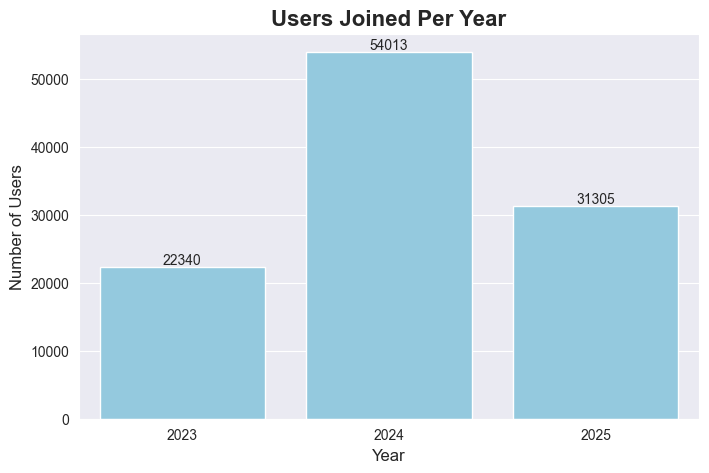

In [17]:
# 1️. Users Joined Per Year 

yearly_users = all_users.groupby('Join_Year')['User_ID'].count().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Join_Year', y='User_ID', data=yearly_users, color='skyblue')

for index, row in yearly_users.iterrows():
    plt.text(index, row['User_ID'], row['User_ID'], ha='center', va='bottom', fontsize=10)

plt.title("Users Joined Per Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()



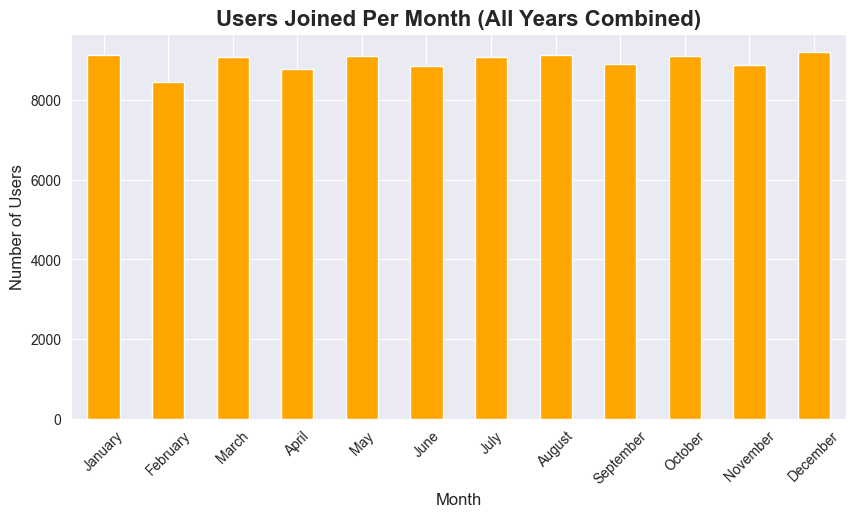

In [18]:
# 2️. Users Joined Per Month (All Years Combined) 

monthly_counts = all_users['Join_Month'].value_counts().reindex(
    ['January','February','March','April','May','June',
     'July','August','September','October','November','December']
)

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar', color='orange')
plt.title("Users Joined Per Month (All Years Combined)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.show()



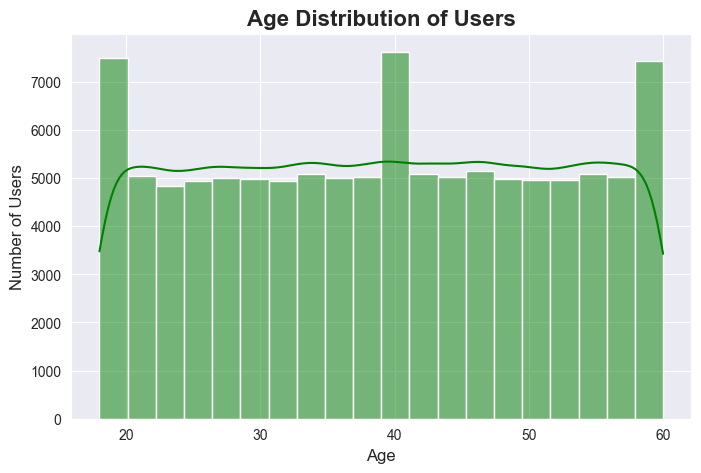

In [19]:
# 3️. Age Distribution 

plt.figure(figsize=(8,5))
sns.histplot(all_users['Age'], bins=20, kde=True, color='green')
plt.title("Age Distribution of Users", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()


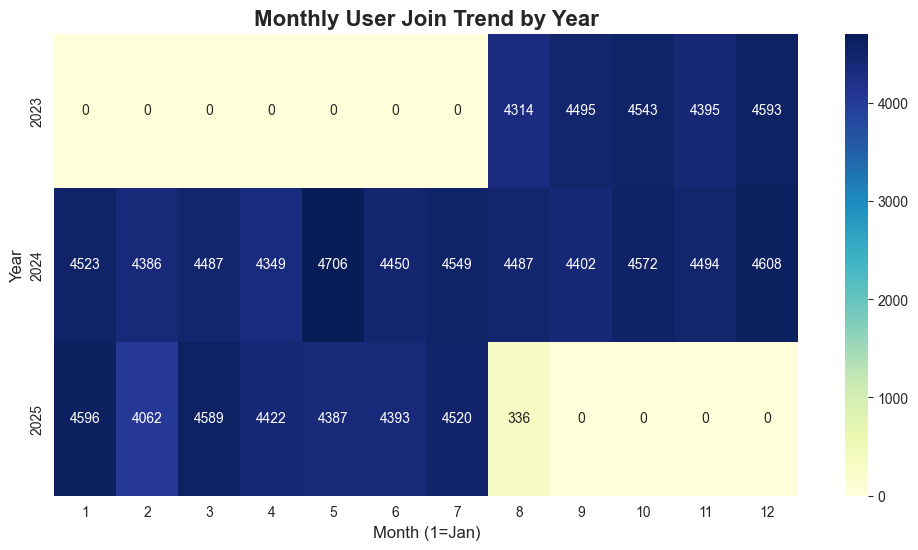

In [20]:
# 4. Users Joined by Month & Year

monthly_yearly = all_users.pivot_table(
    index='Join_Year',
    columns='Month_Num',
    values='User_ID',
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(monthly_yearly, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly User Join Trend by Year", fontsize=16, fontweight='bold')
plt.xlabel("Month (1=Jan)", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.show()


### **2.Insurance EDA**

In [21]:
insurance.head(10)

,Transaction_ID,User_ID,Insurance_Type,Premium,Date,Payment_Status,Reason,State
0,INS_1161B3F7A465,PTM0014961,Term Life,2173.26,2024-06-03,Successful,Successful,Gujarat
1,INS_59741224D257,PTM0041611,Term Life,5509.28,2024-03-22,Successful,Successful,UP
2,INS_D4091460AF19,PTM0032424,Car,12960.80,2024-08-31,Successful,Successful,Delhi
3,INS_813A5622EDB5,PTM0006929,Health,16799.43,2024-06-01,Successful,Successful,Maharashtra
4,INS_9625093BFB70,PTM0015641,Bike,18470.70,2024-07-07,Successful,Successful,Delhi
5,INS_9469A14FFC1E,PTM0037619,Car,14504.86,2024-04-11,Successful,Successful,Delhi
6,INS_AF5949BEA362,PTM0042036,Health,3260.99,2024-05-05,Successful,Successful,Rajasthan
7,INS_8C3D218ABD93,PTM0043416,Bike,10088.51,2024-12-12,Successful,Successful,Delhi
8,INS_C4EC5AF389EC,PTM0036476,Health,19395.05,2024-10-31,Successful,Successful,Tamil Nadu
9,INS_C2875C3ABB67,PTM0021404,Bike,13858.41,2024-07-18,Successful,Successful,Tamil Nadu


In [22]:
insurance.shape

(50000, 8)

In [23]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  50000 non-null  object        
 1   User_ID         50000 non-null  object        
 2   Insurance_Type  50000 non-null  object        
 3   Premium         50000 non-null  float64       
 4   Date            50000 non-null  datetime64[ns]
 5   Payment_Status  50000 non-null  object        
 6   Reason          50000 non-null  object        
 7   State           50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.1+ MB


In [24]:
insurance.describe()


,Premium,Date
count,50000.000000,50000
mean,10258.459314,2024-07-01 01:05:31.199999744
min,500.180000,2024-01-01 00:00:00
25%,5393.437500,2024-04-01 00:00:00
50%,10278.525000,2024-07-01 00:00:00
75%,15141.870000,2024-09-30 00:00:00
max,19999.510000,2024-12-30 00:00:00
std,5628.229842,NaN


In [25]:
insurance.isna().sum()


Transaction_ID    0
User_ID           0
Insurance_Type    0
Premium           0
Date              0
Payment_Status    0
Reason            0
State             0
dtype: int64

In [26]:
# Total Premium by Insurance Type in Millions
total_premium = (insurance.groupby('Insurance_Type')['Premium'].sum().sort_values(ascending=False))

total_premium_mn = (total_premium / 1_000_000).round(2)
total_premium_mn


Insurance_Type
Car          129.35
Term Life    128.86
Bike         128.10
Health       126.61
Name: Premium, dtype: float64

In [27]:
# Number of Policies per Insurance Type
policy_count = insurance['Insurance_Type'].value_counts()
policy_count


Insurance_Type
Term Life    12593
Car          12585
Bike         12501
Health       12321
Name: count, dtype: int64

In [28]:
# Average Premium per Insurance Type
avg_premium = (insurance.groupby('Insurance_Type')['Premium'].mean().round(0))
avg_premium


Insurance_Type
Bike         10247.0
Car          10278.0
Health       10276.0
Term Life    10233.0
Name: Premium, dtype: float64

In [29]:
# Payment Status Analysis
insurance['Payment_Status'].value_counts()


Payment_Status
Successful    47876
Failed         2124
Name: count, dtype: int64

In [30]:
# Insurance Trend Over Time (Monthly)
insurance['Month'] = insurance['Date'].dt.to_period('M')

monthly_premium = (insurance.groupby('Month')['Premium'].sum())
monthly_premium.head()


Month
2024-01    43827489.25
2024-02    41386707.79
2024-03    43241037.04
2024-04    42439020.16
2024-05    44074308.79
Freq: M, Name: Premium, dtype: float64

In [31]:
insurance[['Payment_Status', 'Reason']].head()


,Payment_Status,Reason
0,Successful,Successful
1,Successful,Successful
2,Successful,Successful
3,Successful,Successful
4,Successful,Successful


In [32]:
# Count Failure Reasons
failed_insurance = insurance[insurance['Payment_Status'] != 'Success']
failure_reasons = failed_insurance['Reason'].value_counts()
failure_reasons


Reason
Successful             47876
Wrong PIN                717
Server error             715
Insufficient amount      692
Name: count, dtype: int64

In [66]:
# Percentage Contribution of Each Failure Reason
failure_percentage = (failure_reasons / failure_reasons.sum() * 100).round(2)
failure_percentage

Reason
Successful             95.75
Wrong PIN               1.43
Server error            1.43
Insufficient amount     1.38
Name: count, dtype: float64

In [67]:
# Failure Reason by Insurance Type
pd.crosstab(failed_insurance['Insurance_Type'],failed_insurance['Reason'])

Reason,Insufficient amount,Server error,Successful,Wrong PIN
Insurance_Type,,,,
Bike,189,170,11956,186
Car,174,197,12035,179
Health,154,161,11834,172
Term Life,175,187,12051,180


In [35]:
# Monthly type insurance Premium
insurance['Year'] = insurance['Date'].dt.year
insurance['Month'] = insurance['Date'].dt.month_name()

monthly_type_premium = (insurance.groupby(['Year', 'Month', 'Insurance_Type'])['Premium'].sum().reset_index())
monthly_type_premium.head(10)


,Year,Month,Insurance_Type,Premium
0,2024,April,Bike,10534078.07
1,2024,April,Car,10384610.33
2,2024,April,Health,10943399.17
3,2024,April,Term Life,10576932.59
4,2024,August,Bike,11355492.11
5,2024,August,Car,11339503.64
6,2024,August,Health,10253098.44
7,2024,August,Term Life,10256286.46
8,2024,December,Bike,10398589.41
9,2024,December,Car,10575660.81


In [36]:
monthly_type_premium[monthly_type_premium['Year'] == 2024]


,Year,Month,Insurance_Type,Premium
0,2024,April,Bike,10534078.07
1,2024,April,Car,10384610.33
2,2024,April,Health,10943399.17
3,2024,April,Term Life,10576932.59
4,2024,August,Bike,11355492.11
5,2024,August,Car,11339503.64
6,2024,August,Health,10253098.44
7,2024,August,Term Life,10256286.46
8,2024,December,Bike,10398589.41
9,2024,December,Car,10575660.81


### **Insurance Visualization**

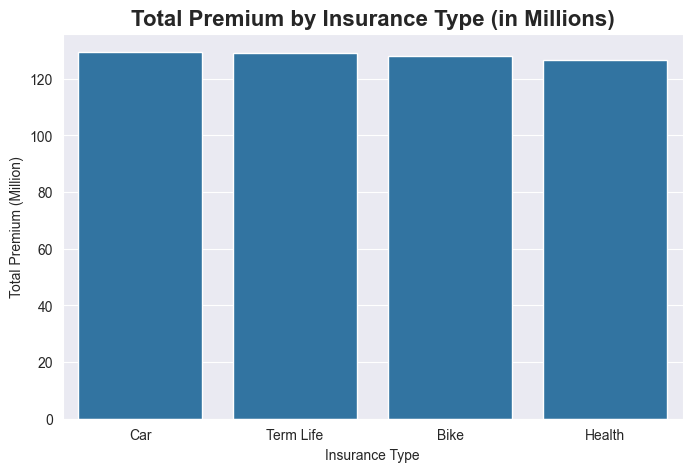

In [37]:
# 1. Total Premium by Insurance Type

plt.figure(figsize=(8,5))
sns.barplot(
    x=total_premium_mn.index,
    y=total_premium_mn.values
)

plt.title("Total Premium by Insurance Type (in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Insurance Type")
plt.ylabel("Total Premium (Million)")
plt.show()


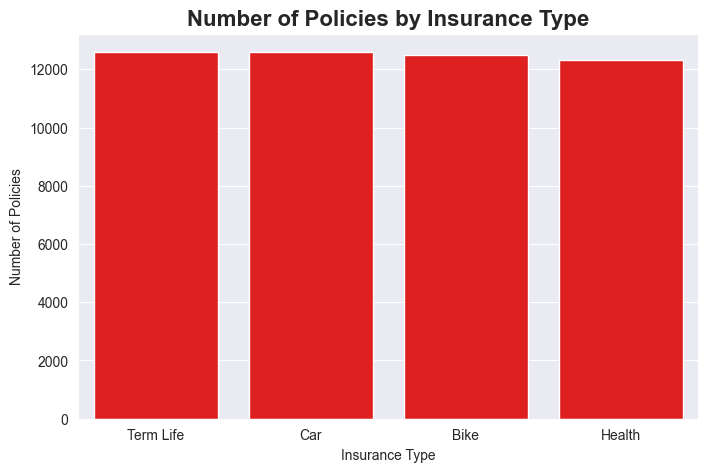

In [38]:
# 2. Policy Count

plt.figure(figsize=(8,5))
sns.barplot(
    x=policy_count.index,
    y=policy_count.values,
    color='red'    
)

plt.title("Number of Policies by Insurance Type", fontsize=16, fontweight='bold')
plt.xlabel("Insurance Type")
plt.ylabel("Number of Policies")
plt.show()


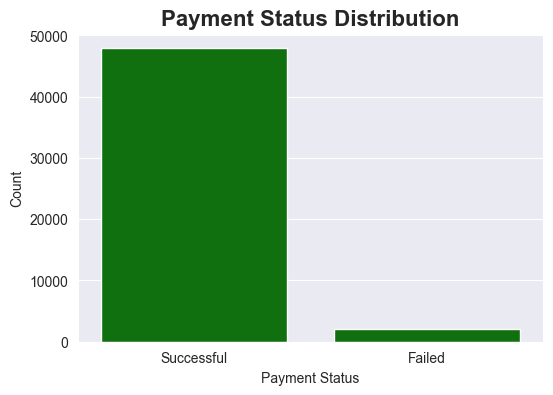

In [39]:
# 3. Payment Status Analysis

plt.figure(figsize=(6,4))
sns.countplot(x='Payment_Status', data=insurance, color='green')

plt.title("Payment Status Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Payment Status")
plt.ylabel("Count")
plt.show()


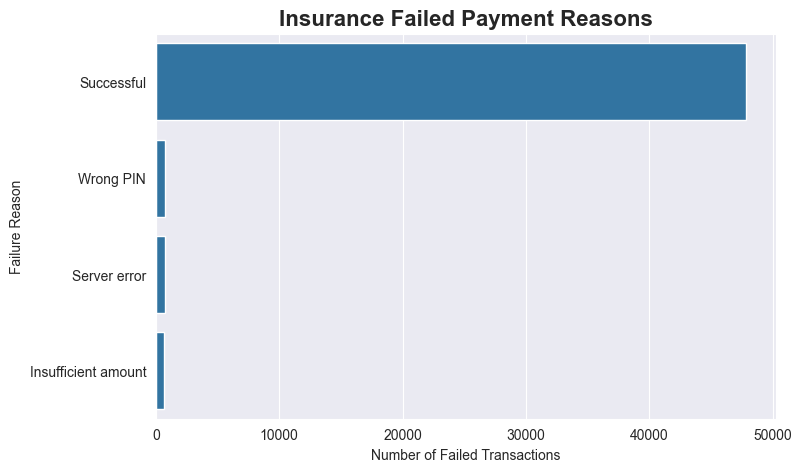

In [40]:
# 4. Failed Payment Reasons

plt.figure(figsize=(8,5))
sns.barplot(
    x=failure_reasons.values,
    y=failure_reasons.index
)

plt.title("Insurance Failed Payment Reasons", fontsize=16, fontweight='bold')
plt.xlabel("Number of Failed Transactions")
plt.ylabel("Failure Reason")
plt.show()


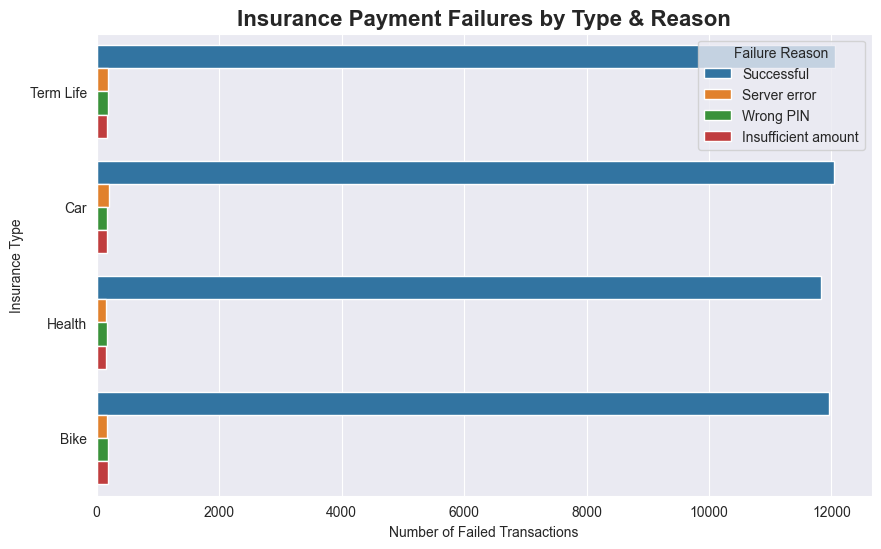

In [41]:
# 5. Failure Reason by Insurance Type

plt.figure(figsize=(10,6))
sns.countplot(
    data=failed_insurance,
    y='Insurance_Type',
    hue='Reason'
)

plt.title("Insurance Payment Failures by Type & Reason", fontsize=16, fontweight='bold')
plt.xlabel("Number of Failed Transactions")
plt.ylabel("Insurance Type")
plt.legend(title="Failure Reason")
plt.show()


### **3.Loan EDA**

In [4]:
loans.head()

,Transaction_ID,User_ID,Loan_Type,Loan_Amount,Date,Payment_Status,Reason,Payment_Mode,State
0,LON_1329C39D026B,PTM1057315,Gold Loan,71162.95,2024-01-20,Successful,Successful,Card,Gujarat
1,LON_AA5EB40B65D8,PTM0044616,Mutual Fund,40957.29,2024-10-26,Successful,Successful,UPI,UP
2,LON_9AED5B360DA3,PTM1073567,Mutual Fund,31208.04,2024-04-11,Successful,Successful,Cash,Delhi
3,LON_0F4FE9465FF6,PTM0042929,Auto Loan,23149.14,2024-10-17,Successful,Successful,Net Banking,Maharashtra
4,LON_A4676711FB3E,PTM0034329,Mutual Fund,47599.00,2024-04-08,Successful,Successful,Net Banking,Delhi


In [5]:
loans.shape

(50000, 9)

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  50000 non-null  object 
 1   User_ID         50000 non-null  object 
 2   Loan_Type       50000 non-null  object 
 3   Loan_Amount     50000 non-null  float64
 4   Date            50000 non-null  object 
 5   Payment_Status  50000 non-null  object 
 6   Reason          50000 non-null  object 
 7   Payment_Mode    50000 non-null  object 
 8   State           50000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [7]:
loans.describe()

,Loan_Amount
count,50000.000000
mean,50650.187255
std,28591.211880
min,1002.160000
25%,25769.160000
50%,50757.205000
75%,75538.225000
max,99999.010000


In [8]:
loans.isna().sum()


Transaction_ID    0
User_ID           0
Loan_Type         0
Loan_Amount       0
Date              0
Payment_Status    0
Reason            0
Payment_Mode      0
State             0
dtype: int64

In [9]:
# Total Loan Amount by Loan Type in Millions
total_loan_amount = (loans.groupby('Loan_Type')['Loan_Amount'].sum().sort_values(ascending=False))

total_loan_amount_mn = (total_loan_amount / 1_000_000).round(2)
total_loan_amount_mn




Loan_Type
Auto Loan       643.64
Mutual Fund     634.21
Gold Loan       632.41
Credit Score    622.24
Name: Loan_Amount, dtype: float64

In [10]:
# Number of Loans by Loan Type
loan_count = loans['Loan_Type'].value_counts()
loan_count


Loan_Type
Auto Loan       12689
Mutual Fund     12481
Gold Loan       12473
Credit Score    12357
Name: count, dtype: int64

In [11]:
# Average Loan Amount per Loan Type
avg_loan_amount = (loans.groupby('Loan_Type')['Loan_Amount'].mean().round(0))

avg_loan_amount


Loan_Type
Auto Loan       50725.0
Credit Score    50356.0
Gold Loan       50703.0
Mutual Fund     50814.0
Name: Loan_Amount, dtype: float64

In [12]:
# Payment Status Distribution
loans['Payment_Status'].value_counts()


Payment_Status
Successful    47973
Failed         2027
Name: count, dtype: int64

In [13]:
# Failed Loan Payments
failed_loans = loans[loans['Payment_Status'] != 'Success']

loan_failure_reasons = failed_loans['Reason'].value_counts()
loan_failure_reasons


Reason
Successful      47973
Wrong Info        700
Server error      692
Bank Denied       635
Name: count, dtype: int64

In [14]:
# Percentage Contribution of Each Failure Reason
loan_failure_percentage = (failed_loans['Reason'].value_counts(normalize=True) * 100).round(2)

loan_failure_percentage


Reason
Successful      95.95
Wrong Info       1.40
Server error     1.38
Bank Denied      1.27
Name: proportion, dtype: float64

In [15]:
# Failure Reason by Insurance Type
pd.crosstab(failed_loans['Loan_Type'],failed_loans['Reason'])


Reason,Bank Denied,Server error,Successful,Wrong Info
Loan_Type,,,,
Auto Loan,165,191,12167,166
Credit Score,141,148,11890,178
Gold Loan,154,183,11949,187
Mutual Fund,175,170,11967,169


In [16]:
# Payment Mode Analysis
loans['Payment_Mode'].value_counts()


Payment_Mode
UPI            12588
Card           12553
Cash           12468
Net Banking    12391
Name: count, dtype: int64

In [23]:
# Time-Based Loan Trend (Monthly)
loans['Year'] = loans['Date'].dt.year
loans['Month'] = loans['Date'].dt.month_name()

monthly_loan_amount = (loans.groupby(['Year', 'Month'])['Loan_Amount'].sum().reset_index())

monthly_loan_amount.head(10)



,Year,Month,Loan_Amount
0,2024,April,2.061390e+08
1,2024,August,2.109038e+08
2,2024,December,2.080995e+08
3,2024,February,2.034984e+08
4,2024,January,2.131652e+08
5,2024,July,2.239809e+08
6,2024,June,2.091437e+08
7,2024,March,2.133719e+08
8,2024,May,2.151443e+08
9,2024,November,2.066376e+08


### **Loans Visualizations**

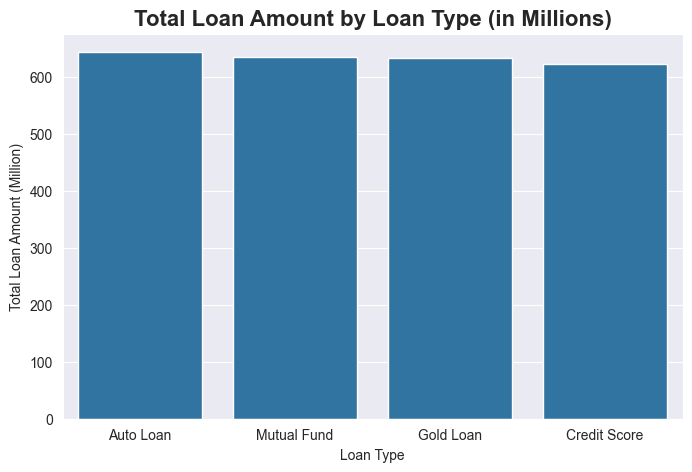

In [24]:
# 1. Total Loan Amount by Type

plt.figure(figsize=(8,5))
sns.barplot(
    x=total_loan_amount_mn.index,
    y=total_loan_amount_mn.values
)

plt.title("Total Loan Amount by Loan Type (in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Loan Type")
plt.ylabel("Total Loan Amount (Million)")
plt.show()


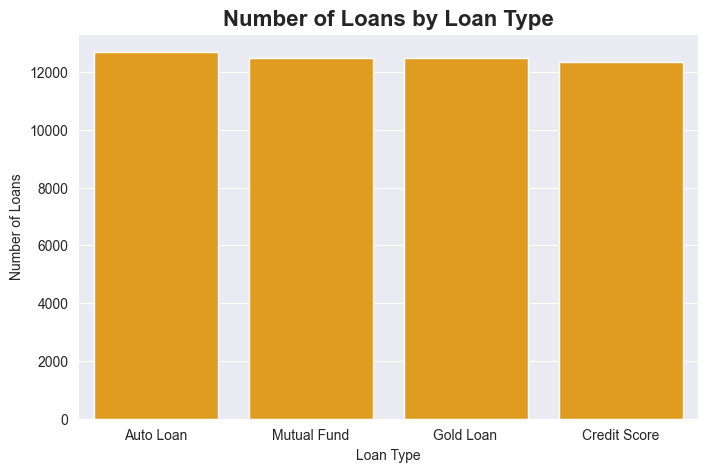

In [26]:
# 2. Number of Loans by Loan Type

plt.figure(figsize=(8,5))
sns.barplot(
    x=loan_count.index,
    y=loan_count.values,
    color= 'orange'
)

plt.title("Number of Loans by Loan Type", fontsize=16, fontweight='bold')
plt.xlabel("Loan Type")
plt.ylabel("Number of Loans")
plt.show()


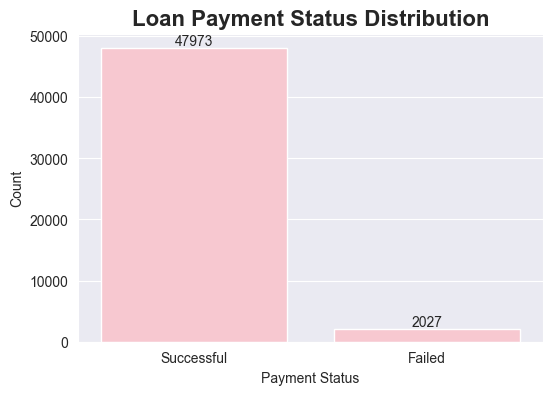

In [31]:
# 3. Payment Status Distribution

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Payment_Status', data=loans, color='pink')

plt.title("Loan Payment Status Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Payment Status")
plt.ylabel("Count")

# Add numbers on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\3755674525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


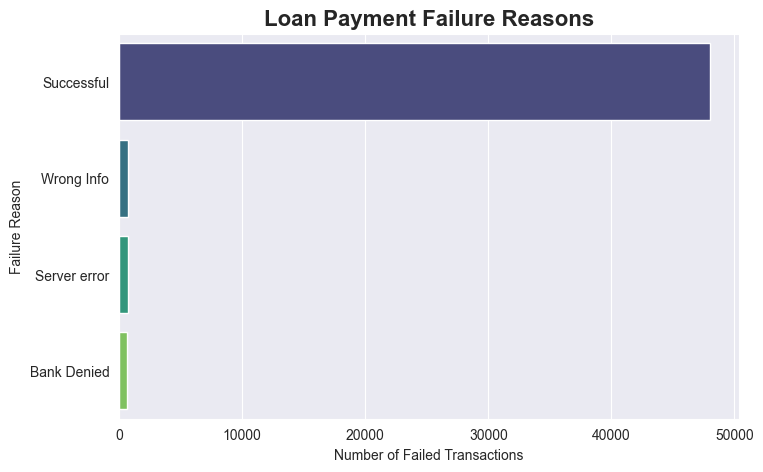

In [35]:
# 4. Failed Loan Payment

plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=loan_failure_reasons.values,
    y=loan_failure_reasons.index,
    palette='viridis'   
)

plt.title("Loan Payment Failure Reasons", fontsize=16, fontweight='bold')
plt.xlabel("Number of Failed Transactions")
plt.ylabel("Failure Reason")

plt.show()



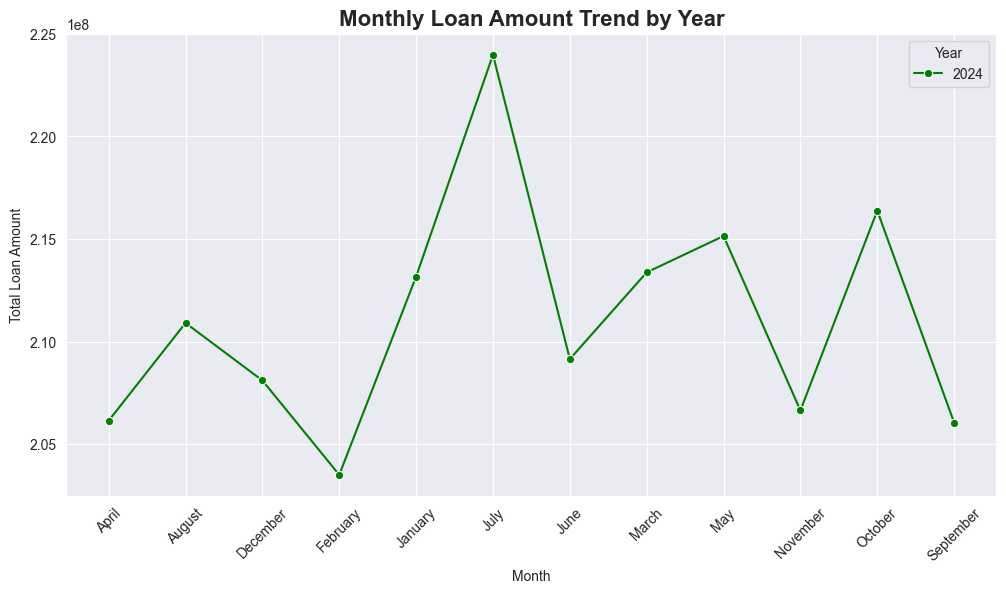

In [43]:
# 5. Time-Based Loan Trend (Monthly)

palette_colors = {2024 : 'green'}

plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_loan_amount,
    x='Month',
    y='Loan_Amount',
    hue='Year',
    marker='o',
    palette=palette_colors
)

plt.title("Monthly Loan Amount Trend by Year", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Loan Amount")
plt.xticks(rotation=45)
plt.show()



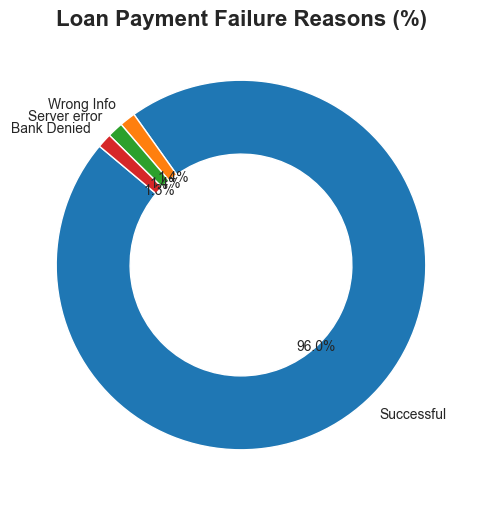

In [44]:
# 6. Loan Failure Reasons

plt.figure(figsize=(6,6))

plt.pie(
    loan_failure_percentage.values,
    labels=loan_failure_percentage.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4}
)

plt.title("Loan Payment Failure Reasons (%)", fontsize=16, fontweight='bold')
plt.show()


### **4.Money_Transfer EDA**

In [46]:
money_transfer.head()

,Transaction_ID,User_ID,Transfer_Type,Amount,Date,Payment_Status,Reason,Rating,State
0,MTX_E258FAF7C042,PTM1068692,To Self Account,1678.20,2024-02-09,Successful,Successful,2.0,Gujarat
1,MTX_80B43327CBE4,PTM0021745,To Mobile Number,2195.34,2024-06-03,Successful,Successful,4.6,UP
2,MTX_D61559C04F15,PTM0017430,To QR Code,1934.94,2024-01-07,Successful,Successful,1.5,Delhi
3,MTX_693373EE78A6,PTM1099074,To UPI ID,1975.31,2024-10-06,Successful,Successful,4.2,Maharashtra
4,MTX_D3AF01B270AF,PTM1054775,To Self Account,1870.31,2024-07-27,Successful,Successful,4.9,Delhi


In [47]:
money_transfer.shape

(150000, 9)

In [48]:
money_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  150000 non-null  object        
 1   User_ID         150000 non-null  object        
 2   Transfer_Type   150000 non-null  object        
 3   Amount          150000 non-null  float64       
 4   Date            150000 non-null  datetime64[ns]
 5   Payment_Status  150000 non-null  object        
 6   Reason          150000 non-null  object        
 7   Rating          150000 non-null  float64       
 8   State           150000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.3+ MB


In [49]:
money_transfer.describe()

,Amount,Date,Rating
count,150000.000000,150000,150000.000000
mean,2521.297548,2024-07-01 04:24:16.703999744,3.000234
min,50.040000,2024-01-01 00:00:00,1.000000
25%,1288.727500,2024-04-01 00:00:00,2.000000
50%,2522.350000,2024-07-01 00:00:00,3.000000
75%,3760.200000,2024-10-01 00:00:00,4.000000
max,4999.990000,2024-12-30 00:00:00,5.000000
std,1429.210487,NaN,1.153132


In [50]:
money_transfer.isnull().sum()

Transaction_ID    0
User_ID           0
Transfer_Type     0
Amount            0
Date              0
Payment_Status    0
Reason            0
Rating            0
State             0
dtype: int64

In [51]:
# Rating column is not needed for money transfer analysis
money_transfer.drop(columns=['Rating'], inplace=True)

In [52]:
money_transfer.columns

Index(['Transaction_ID', 'User_ID', 'Transfer_Type', 'Amount', 'Date',
       'Payment_Status', 'Reason', 'State'],
      dtype='object')

In [54]:
money_transfer['Date'] = pd.to_datetime(money_transfer['Date'], errors='coerce')

money_transfer['Year'] = money_transfer['Date'].dt.year
money_transfer['Month'] = money_transfer['Date'].dt.month_name()

money_transfer['Year'].value_counts()


Year
2024    150000
Name: count, dtype: int64

In [55]:
# Total Transfer Amount by Transfer Type (in Millions)
total_transfer_amount = (money_transfer.groupby('Transfer_Type')['Amount'].sum().sort_values(ascending=False))

total_transfer_amount_mn = (total_transfer_amount / 1_000_000).round(2)
total_transfer_amount_mn


Transfer_Type
To UPI ID           95.19
To Self Account     94.40
To QR Code          94.31
To Mobile Number    94.29
Name: Amount, dtype: float64

In [56]:
# Number of Transfers by Transfer Type
transfer_count = money_transfer['Transfer_Type'].value_counts()
transfer_count

Transfer_Type
To UPI ID           37611
To Self Account     37516
To Mobile Number    37476
To QR Code          37397
Name: count, dtype: int64

In [57]:
# Average Transfer Amount per Transfer Type
avg_transfer_amount = (money_transfer.groupby('Transfer_Type')['Amount'].mean().round(0))

avg_transfer_amount


Transfer_Type
To Mobile Number    2516.0
To QR Code          2522.0
To Self Account     2516.0
To UPI ID           2531.0
Name: Amount, dtype: float64

In [58]:
# Payment Status Distribution
money_transfer['Payment_Status'].value_counts()


Payment_Status
Successful    143963
Failed          6037
Name: count, dtype: int64

In [59]:
# Failed Money Transfers
failed_transfers = money_transfer[money_transfer['Payment_Status'] != 'Success']

transfer_failure_reasons = failed_transfers['Reason'].value_counts()
transfer_failure_reasons


Reason
Successful             143963
Insufficient amount      2079
Server error             2001
Wrong PIN                1957
Name: count, dtype: int64

In [60]:
# Percentage Contribution of Each Failure Reason
transfer_failure_percentage = (failed_transfers['Reason'].value_counts(normalize=True).mul(100).round(2))
transfer_failure_percentage


Reason
Successful             95.98
Insufficient amount     1.39
Server error            1.33
Wrong PIN               1.30
Name: proportion, dtype: float64

In [61]:
# Failure Reason by Transfer Type
pd.crosstab(
    failed_transfers['Transfer_Type'],
    failed_transfers['Reason']
)


Reason,Insufficient amount,Server error,Successful,Wrong PIN
Transfer_Type,,,,
To Mobile Number,514,482,36003,477
To QR Code,512,512,35899,474
To Self Account,513,486,36013,504
To UPI ID,540,521,36048,502


In [62]:
# Time-Based Money Transfer Trend (Monthly)
money_transfer['Year'] = money_transfer['Date'].dt.year
money_transfer['Month'] = money_transfer['Date'].dt.month_name()

monthly_transfer_amount = (
    money_transfer
    .groupby(['Year', 'Month'])['Amount']
    .sum()
    .reset_index()
)

monthly_transfer_amount.head(10)


,Year,Month,Amount
0,2024,April,30814807.26
1,2024,August,31825398.92
2,2024,December,31358503.50
3,2024,February,29834680.98
4,2024,January,32238658.26
5,2024,July,31838892.32
6,2024,June,31108351.82
7,2024,March,31882660.33
8,2024,May,32489358.95
9,2024,November,31495050.71


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\74533706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


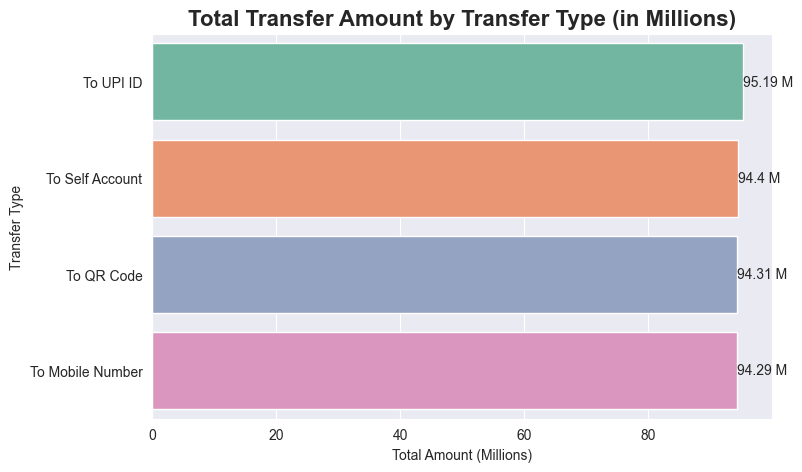

In [63]:
# 1️. Total Transfer Amount by Transfer Type

plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=total_transfer_amount_mn.values,
    y=total_transfer_amount_mn.index,
    palette='Set2'
)

# Add numbers on bars
for i, v in enumerate(total_transfer_amount_mn.values):
    ax.text(v, i, f'{v} M', va='center')

plt.title("Total Transfer Amount by Transfer Type (in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Total Amount (Millions)")
plt.ylabel("Transfer Type")
plt.show()


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\2355236443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


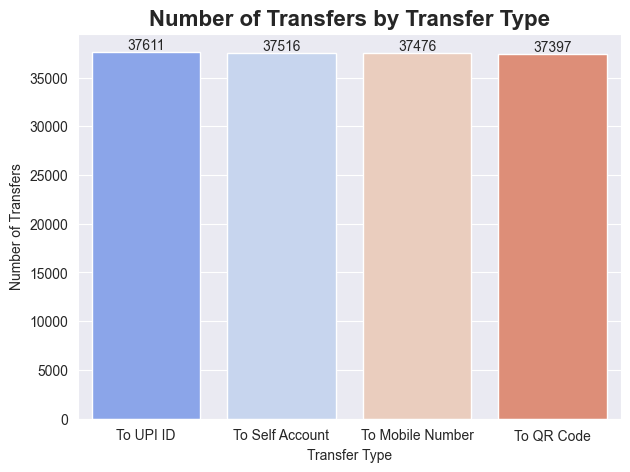

In [64]:
# 2️. Number of Transfers by Transfer Type

plt.figure(figsize=(7,5))

ax = sns.barplot(
    x=transfer_count.index,
    y=transfer_count.values,
    palette='coolwarm'
)

for i, v in enumerate(transfer_count.values):
    ax.text(i, v, v, ha='center', va='bottom')

plt.title("Number of Transfers by Transfer Type", fontsize=16, fontweight='bold')
plt.xlabel("Transfer Type")
plt.ylabel("Number of Transfers")
plt.show()


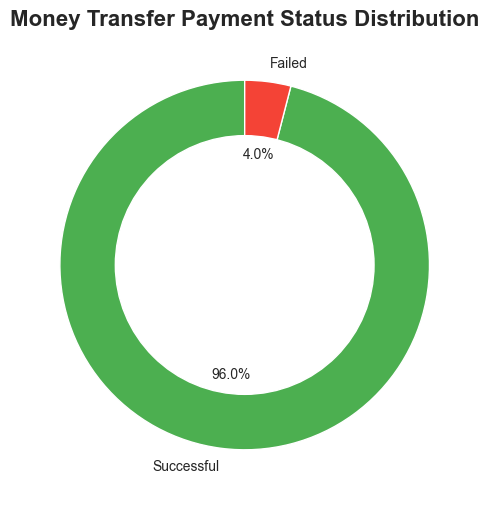

In [65]:
# 4️. Payment Status Distribution

status_counts = money_transfer['Payment_Status'].value_counts()

plt.figure(figsize=(6,6))

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Money Transfer Payment Status Distribution", fontsize=16, fontweight='bold')
plt.show()


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\690885867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


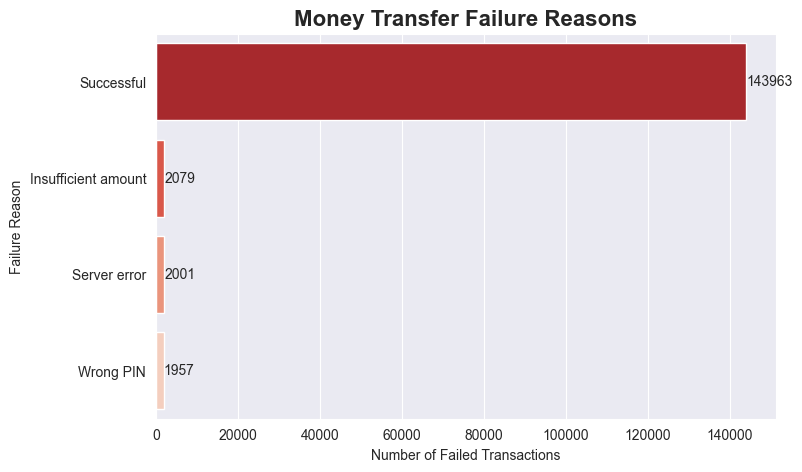

In [66]:
# 5️. Transfer Failure Reasons

plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=transfer_failure_reasons.values,
    y=transfer_failure_reasons.index,
    palette='Reds_r'
)

for i, v in enumerate(transfer_failure_reasons.values):
    ax.text(v, i, v, va='center')

plt.title("Money Transfer Failure Reasons", fontsize=16, fontweight='bold')
plt.xlabel("Number of Failed Transactions")
plt.ylabel("Failure Reason")
plt.show()


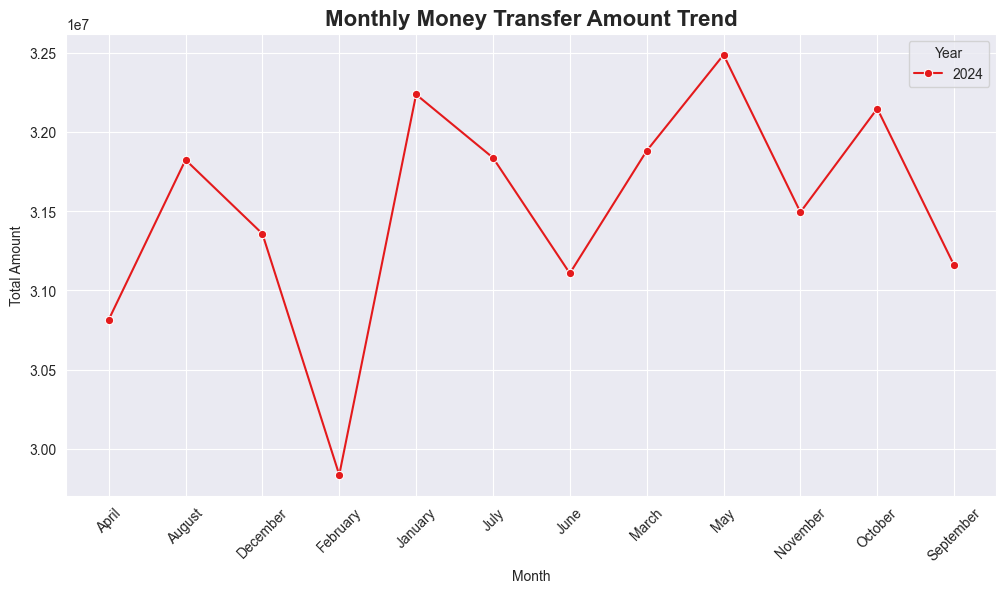

In [68]:
# 6️. Monthly Money Transfer Trend

monthly_transfer_amount_sorted = (
    monthly_transfer_amount
    .sort_values(by=['Year', 'Month'])
)

plt.figure(figsize=(12,6))

sns.lineplot(
    data=monthly_transfer_amount_sorted,
    x='Month',
    y='Amount',
    hue='Year',
    marker='o',
    palette='Set1'
)

plt.title("Monthly Money Transfer Amount Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


### **5.Recharge_Bills EDA**

In [69]:
# Total Recharge Amount by Recharge Type (in Millions)
total_recharge_amount = (
    recharge_bills
    .groupby('Recharge_Type')['Amount']
    .sum()
    .sort_values(ascending=False)
)

total_recharge_amount_mn = (total_recharge_amount / 1_000_000).round(2)
total_recharge_amount_mn


Recharge_Type
Electricity Bill    12.82
DTH                 12.64
Mobile Recharge     12.63
Cable TV            12.61
Name: Amount, dtype: float64

In [70]:
# Number of Recharges by Recharge Type
recharge_count = recharge_bills['Recharge_Type'].value_counts()
recharge_count


Recharge_Type
Electricity Bill    12598
Cable TV            12516
DTH                 12471
Mobile Recharge     12415
Name: count, dtype: int64

In [72]:
# Average Recharge Amount per Recharge Type
avg_recharge_amount = (recharge_bills.groupby('Recharge_Type')['Amount'].mean().round(0))
avg_recharge_amount


Recharge_Type
Cable TV            1008.0
DTH                 1013.0
Electricity Bill    1017.0
Mobile Recharge     1017.0
Name: Amount, dtype: float64

In [73]:
# Payment Status Distribution
recharge_bills['Payment_Status'].value_counts()


Payment_Status
Successful    48079
Failed         1921
Name: count, dtype: int64

In [74]:
# Failed Recharge Transactions
failed_recharges = recharge_bills[recharge_bills['Payment_Status'] != 'Success']

recharge_failure_reasons = failed_recharges['Reason'].value_counts()
recharge_failure_reasons


Reason
Successful             48079
Server error             661
Wrong PIN                642
Insufficient amount      618
Name: count, dtype: int64

In [75]:
# Percentage Contribution of Each Failure Reason
recharge_failure_percentage = (
    failed_recharges['Reason']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

recharge_failure_percentage


Reason
Successful             96.16
Server error            1.32
Wrong PIN               1.28
Insufficient amount     1.24
Name: proportion, dtype: float64

In [76]:
# Failure Reason by Recharge Type
pd.crosstab(
    failed_recharges['Recharge_Type'],
    failed_recharges['Reason']
)


Reason,Insufficient amount,Server error,Successful,Wrong PIN
Recharge_Type,,,,
Cable TV,172,160,12039,145
DTH,153,177,11985,156
Electricity Bill,141,162,12134,161
Mobile Recharge,152,162,11921,180


In [77]:
# Time-Based Recharge Trend (Monthly)
recharge_bills['Year'] = recharge_bills['Date'].dt.year
recharge_bills['Month'] = recharge_bills['Date'].dt.month_name()

monthly_recharge_amount = (
    recharge_bills
    .groupby(['Year', 'Month'])['Amount']
    .sum()
    .reset_index()
)

monthly_recharge_amount.head(10)


,Year,Month,Amount
0,2024,April,4193603.52
1,2024,August,4280922.22
2,2024,December,4153381.59
3,2024,February,4155938.86
4,2024,January,4224489.96
5,2024,July,4233904.86
6,2024,June,4101385.74
7,2024,March,4205278.51
8,2024,May,4349262.01
9,2024,November,4268945.05


### **Recharge_Bills Visualizations**

C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\2869518038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


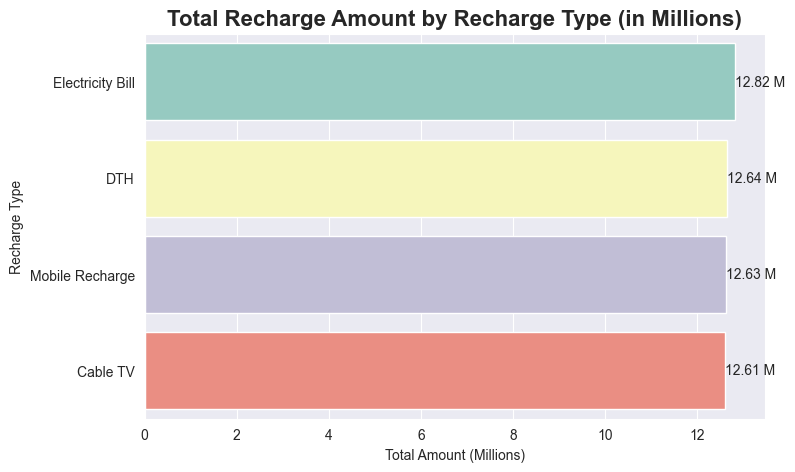

In [78]:
# 1️. Total Recharge Amount by Recharge Type(in Millions)
plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=total_recharge_amount_mn.values,
    y=total_recharge_amount_mn.index,
    palette='Set3'
)

# Add values on bars
for i, v in enumerate(total_recharge_amount_mn.values):
    ax.text(v, i, f'{v} M', va='center')

plt.title("Total Recharge Amount by Recharge Type (in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Total Amount (Millions)")
plt.ylabel("Recharge Type")
plt.show()


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\2788086060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


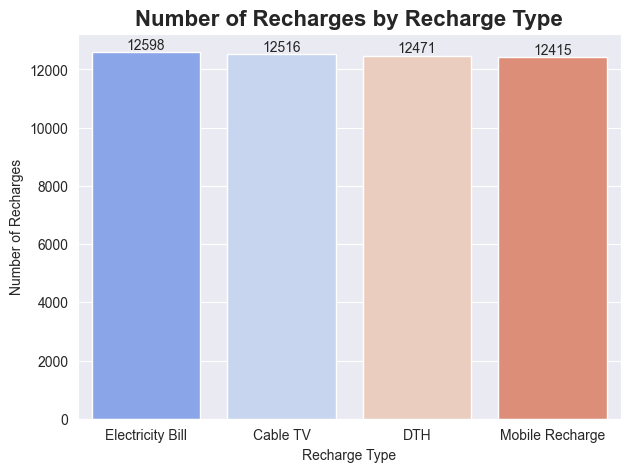

In [79]:
# 2️. Number of Recharges by Recharge Type
plt.figure(figsize=(7,5))

ax = sns.barplot(
    x=recharge_count.index,
    y=recharge_count.values,
    palette='coolwarm'
)

for i, v in enumerate(recharge_count.values):
    ax.text(i, v, v, ha='center', va='bottom')

plt.title("Number of Recharges by Recharge Type", fontsize=16, fontweight='bold')
plt.xlabel("Recharge Type")
plt.ylabel("Number of Recharges")
plt.show()


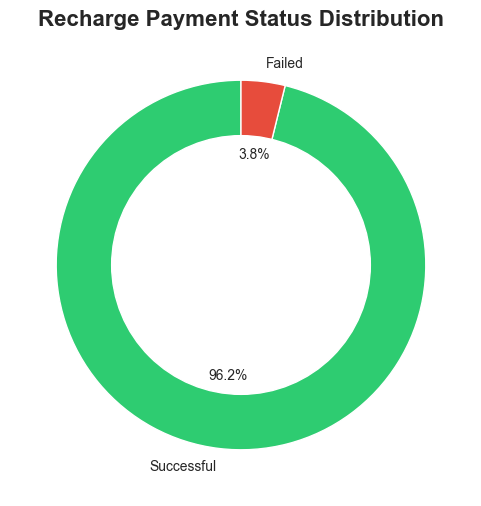

In [80]:
# 4️. Payment Status Distribution
status_counts = recharge_bills['Payment_Status'].value_counts()

plt.figure(figsize=(6,6))

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2ECC71', '#E74C3C']
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Recharge Payment Status Distribution", fontsize=16, fontweight='bold')
plt.show()


C:\Users\Khushbu Parekh\AppData\Local\Temp\ipykernel_15416\3650798673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


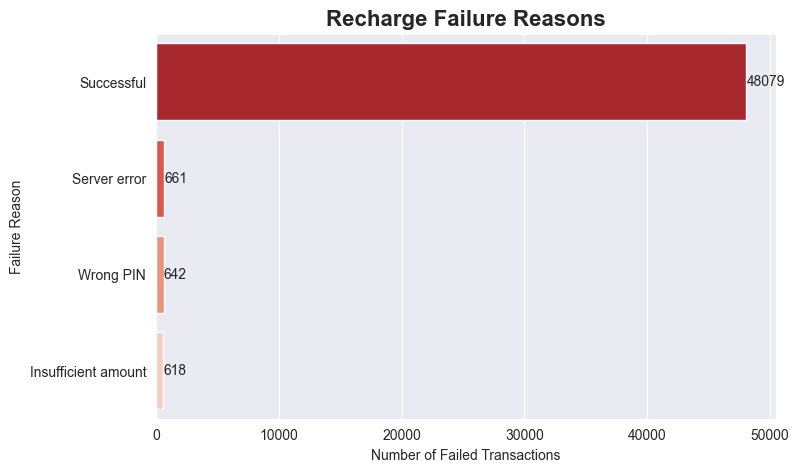

In [89]:
# 5️. Recharge Failure Reasons
plt.figure(figsize=(8,5))

ax = sns.barplot(
    x=recharge_failure_reasons.values,
    y=recharge_failure_reasons.index,
    palette='Reds_r'
)

for i, v in enumerate(recharge_failure_reasons.values):
    ax.text(v, i, v, va='center')

plt.title("Recharge Failure Reasons", fontsize=16, fontweight='bold')
plt.xlabel("Number of Failed Transactions")
plt.ylabel("Failure Reason")
plt.show()


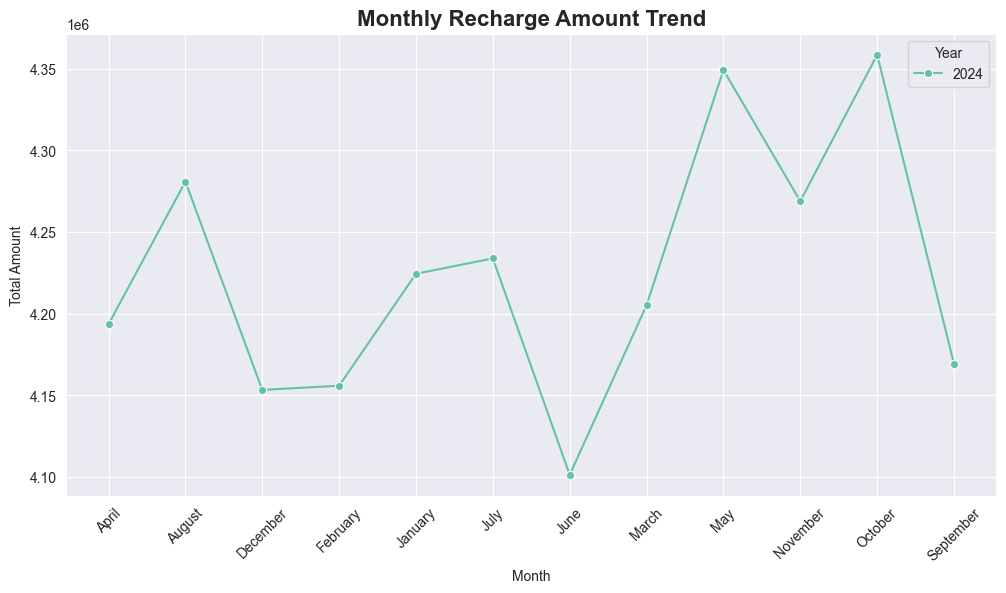

In [82]:
# 7️. Monthly Recharge Amount Trend
monthly_recharge_sorted = (
    monthly_recharge_amount
    .sort_values(by=['Year', 'Month'])
)

plt.figure(figsize=(12,6))

sns.lineplot(
    data=monthly_recharge_sorted,
    x='Month',
    y='Amount',
    hue='Year',
    marker='o',
    palette='Set2'
)

plt.title("Monthly Recharge Amount Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


In [10]:
pip install pymysql sqlalchemy cryptography


   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.5 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.5 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.5 MB 501.1 kB/s eta 0:00:06
   ----- ---------------------------------- 0.5/3.5 MB 501.1 kB/s eta 0:00:06
   -------- ------------------------------- 0.8/3.5 MB 508.7 kB/s eta 0:00:06
   -------- ------------------------------- 0.8/3.5 MB 508.7 kB/s eta 0:00:06
   ----------- ---------------------------- 1.0/3.5 MB 539.7 kB/s eta 0:00:05
   ----------- ---------------------------- 1.0/3.5 MB 539.7 kB/s eta 0:00:05
   -------------- ------------------------- 1.3/3.5 MB 579.8 kB/s eta 0:00:04
   ----------------- -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sqlalchemy import create_engine, text
import pandas as pd
import urllib.parse

# MySQL credentials
username = "root"
password = "Karela@_2306"  
host = "localhost"
port = "3306"
database = "paytm_final_db"

# Encode password (important if special characters exist)
encoded_password = urllib.parse.quote_plus(password)

# Create engine (NO database yet)
engine = create_engine(
    f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}",
    echo=False
)

print("Connected to MySQL Server")



Connected to MySQL Server


In [12]:
from sqlalchemy import text

with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS paytm_final_db"))
    conn.commit()

print("Database created or already exists")


Database created or already exists


In [13]:
engine = create_engine(
    f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}",
    echo=False
)

print("Connected to paytm_final_db")


Connected to paytm_final_db


In [14]:
all_users.to_sql("all_users", engine, if_exists="replace", index=False)
loans.to_sql("loans", engine, if_exists="replace", index=False)
insurance.to_sql("insurance", engine, if_exists="replace", index=False)
money_transfer.to_sql("money_transfer", engine, if_exists="replace", index=False)
recharge_bills.to_sql("recharge_bills", engine, if_exists="replace", index=False)

print("All tables uploaded successfully")


All tables uploaded successfully


In [15]:
query = "SELECT * FROM all_users LIMIT 5;"
pd.read_sql(query, engine)


,User_ID,Name,Age,Join_Date,Gender,Profile_Age,Country
0,PTM0000001,Holly Rivera,56,2025-06-17,Male,Kid,USA
1,PTM0000002,Kevin Lopez,46,2023-12-10,Male,Kid,Germany
2,PTM0000003,Douglas Roberts,32,2024-09-14,Male,Adult,Australia
3,PTM0000004,Walter Davila,60,2023-10-19,Male,Adult,USA
4,PTM0000005,Grace Blake,25,2025-03-10,Male,Adult,Brazil


In [16]:
pd.read_sql("SHOW TABLES;", engine)


,Tables_in_paytm_final_db
0,all_users
1,insurance
2,loans
3,money_transfer
4,recharge_bills
